In [555]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Binary Classification - Data Preparation

In [556]:
df = pd.read_csv("/workspaces/ml-zoomcamp-hw/03-Classification/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [557]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [558]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [559]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [560]:
df['totalcharges']= pd.to_numeric(df.totalcharges, errors='coerce')
df[df.totalcharges.isnull()][['customerid', 'totalcharges']]


,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [561]:
df.totalcharges = df.totalcharges.fillna(0)


In [562]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [563]:
df.churn = (df.churn == 'yes').astype(int)

Validation setup

In [564]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=1)

len(df_full_train), len(df_train), len(df_val,), len(df_test)


(5634, 4225, 1409, 1409)

In [565]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



In [566]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [567]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

EDA

In [568]:
df_full_train = df_full_train.reset_index(drop=True)

In [569]:
df_full_train['churn'].value_counts()
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [570]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [571]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [572]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [573]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [574]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

<Axes: xlabel='churn', ylabel='Count'>

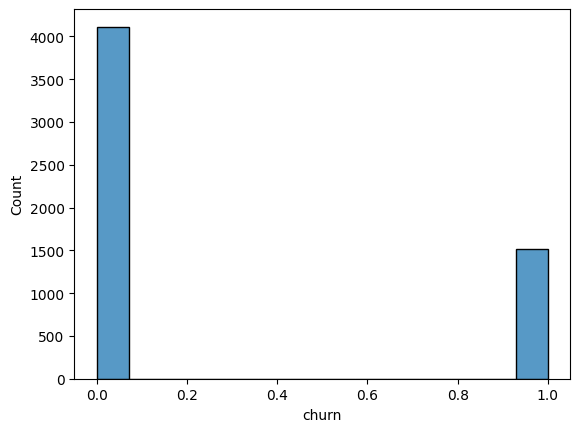

In [575]:
sns.histplot(df_full_train['churn'])

Churn Rate and Risk Ratio

In [576]:
df_full_train[df_full_train.gender == 'female']['churn'].mean()

np.float64(0.27682403433476394)

In [577]:
df_full_train[df_full_train.gender == 'male']['churn'].mean()

np.float64(0.2632135306553911)

In [578]:
global_churn_rate

np.float64(0.26996805111821087)

In [579]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [580]:
churn_male = df_full_train[df_full_train.gender == 'male']['churn'].mean()
churn_female = df_full_train[df_full_train.gender == 'female']['churn'].mean()

In [581]:
churn_with_partner = df_full_train[df_full_train.partner == 'yes']['churn'].mean()
churn_with_partner

np.float64(0.20503330866025166)

In [582]:
churn_no_partner = df_full_train[df_full_train.partner == 'no']['churn'].mean()
churn_no_partner

np.float64(0.3298090040927694)

In [583]:
global_churn_rate - churn_male

np.float64(0.006754520462819769)

#Feature importance, since we are looking at churn rate, comparing the global churn rate to the various churn rates of multiple groups 
#to figure out which groups differ from the global helps identify important features. 



Group Difference

In [584]:
churn_no_partner/global_churn_rate

np.float64(1.2216593879412643)

In [585]:
churn_with_partner/global_churn_rate

np.float64(0.7594724924338315)

Risk Ratio = Group Churn Rate/Global Churn if greater than 1, more likely to churn, less than one, less likely to churn

In [586]:
from IPython.display import display

In [587]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [588]:
#Test code to save all the dif and risk values into a dataframe

df_group_test = pd.DataFrame()
categorical_test = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']


for c in categorical_test:
    temp = (
        df_full_train
        .groupby(c, dropna=False)['churn']
        .agg(mean='mean', count='count')
        .reset_index()
    )

    temp['diff'] = temp['mean'] - global_churn_rate
    temp['risk'] = temp['mean'] / global_churn_rate
    temp['category'] = c

    # reorder columns so category comes first, value comes second
    #The value column is the values from the category c, we just rename it to values here. 
    temp = temp[['category', c, 'mean', 'count', 'diff', 'risk']]
    temp = temp.rename(columns={c: 'value'})

    # append to main df_group_test
    df_group_test = pd.concat([df_group_test, temp], ignore_index=True)

# final cleanup: drop index just to be safe if saving or exporting
df_group_test.reset_index(drop=True, inplace=True)
    

In [589]:
df_group_test


,category,value,mean,count,diff,risk
0,gender,female,0.276824,2796,0.006856,1.025396
1,gender,male,0.263214,2838,-0.006755,0.974980
2,seniorcitizen,0,0.242270,4722,-0.027698,0.897403
3,seniorcitizen,1,0.413377,912,0.143409,1.531208
4,partner,no,0.329809,2932,0.059841,1.221659
5,partner,yes,0.205033,2702,-0.064935,0.759472
6,dependents,no,0.313760,3968,0.043792,1.162212
7,dependents,yes,0.165666,1666,-0.104302,0.613651
8,phoneservice,no,0.241316,547,-0.028652,0.893870
9,phoneservice,yes,0.273049,5087,0.003081,1.011412


In [590]:
df_group_test.sort_values('risk', ascending=False)

,category,value,mean,count,diff,risk
41,paymentmethod,electronic_check,0.455890,1893,0.185922,1.688682
34,contract,month-to-month,0.431701,3104,0.161733,1.599082
14,internetservice,fiber_optic,0.425171,2479,0.155203,1.574895
16,onlinesecurity,no,0.420921,2801,0.150953,1.559152
25,techsupport,no,0.418914,2781,0.148946,1.551717
3,seniorcitizen,1,0.413377,912,0.143409,1.531208
19,onlinebackup,no,0.404323,2498,0.134355,1.497672
22,deviceprotection,no,0.395875,2473,0.125907,1.466379
28,streamingtv,no,0.342832,2246,0.072864,1.269897
31,streamingmovies,no,0.338906,2213,0.068938,1.255358


Feature Importance - Mutual Information
Mutual information quantifies the amount of information that one variable contains about another — it measures the degree of dependency between the two.

In [591]:
from sklearn.metrics import mutual_info_score

In [592]:
mutual_info_score(df_full_train.churn, df_full_train.internetservice)

0.055867945893496467

In [593]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [594]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [595]:
#For each column in the list of values in categorical, we apply this function
df_full_train[categorical].apply(mutual_info_churn_score)

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Correlation 

In [596]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

One-hot encoding 

In [597]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [598]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [599]:
from sklearn.feature_extraction import DictVectorizer
df_train[['gender', 'contract', 'tenure']].iloc[:100]

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
...,...,...,...
95,male,one_year,39
96,female,month-to-month,19
97,male,month-to-month,21
98,male,one_year,43


In [600]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts


[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [601]:
dv= DictVectorizer(sparse=False)

In [602]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [603]:
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [604]:
dv.transform(train_dicts)
X_train = dv.transform(train_dicts)

In [605]:
#faster method
X_train = dv.fit_transform(train_dicts)

In [606]:
#only transform for validation set
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]], shape=(1409, 45))

Logistic Regression 

In [607]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [608]:
z = np.linspace(-5, 5, 51)

sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

In [609]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return result

In [610]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
        
    reulst = sigmoid(score)   
    return result

Training Logistic Regression with Scikit-Learn

In [611]:
from sklearn.linear_model import LogisticRegression

In [612]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [613]:
#Bias and intercept are synonyms
model.intercept_[0]

np.float64(-0.045323382519725265)

In [614]:
model.coef_[0]

array([ 6.84563865e-01,  3.85627805e-02, -6.82106720e-01,  5.59874182e-02,
       -1.49674921e-02,  1.13934134e-01, -1.59961569e-01,  8.70473614e-02,
        3.94140853e-02,  1.60584095e-03, -4.97473553e-01,  6.98455049e-01,
       -1.59961569e-01, -1.79930514e-02, -1.87166364e-01,  6.61224966e-02,
        1.62063794e-01,  1.16725547e-01, -1.59961569e-01,  8.42559483e-02,
        2.85032504e-01, -1.59961569e-01, -8.40510084e-02, -1.61238079e-01,
        2.02258005e-01, -4.45575410e-02,  8.55774672e-02, -5.15350530e-02,
       -2.96985505e-03,  1.06354594e-01, -1.08297599e-02,  6.61224966e-02,
       -2.51025705e-02,  1.93985926e-01, -9.41528635e-02, -1.59961569e-01,
        2.95134358e-01, -5.39335450e-02, -1.59961569e-01,  2.54915040e-01,
        2.35033033e-01, -1.59961569e-01, -3.40515382e-02, -6.85347146e-02,
        3.95932211e-04])

In [615]:
#Hard predictions
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [616]:
#Soft probability, since it gives us a probability value between 0 and 1, instead of a hard value of 0 or 1
#Two columns, 1st is probability of 0 or negative, in this cae not churning, second column is probability of churning, so the probability 
#of the score being 1
model.predict_proba(X_val)

array([[0.9933762 , 0.0066238 ],
       [0.79517747, 0.20482253],
       [0.78218201, 0.21781799],
       ...,
       [0.84850356, 0.15149644],
       [0.21152144, 0.78847856],
       [0.18809609, 0.81190391]], shape=(1409, 2))

In [617]:
#Grab the second column, which the probability of churning
y_pred = model.predict_proba(X_val)[:,1]

In [618]:
churn_decision = (y_pred >= 0.5)
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [619]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [620]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val


In [621]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred['correct']

0        True
1        True
2        True
3        True
4        True
        ...  
1404     True
1405    False
1406     True
1407     True
1408     True
Name: correct, Length: 1409, dtype: bool

In [622]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

In [623]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

 Model Interpretation

In [624]:
a = [1, 2, 3, 4]
b = 'abcd'

In [625]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [626]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.685),
 'contract=one_year': np.float64(0.039),
 'contract=two_year': np.float64(-0.682),
 'dependents=no': np.float64(0.056),
 'dependents=yes': np.float64(-0.015),
 'deviceprotection=no': np.float64(0.114),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.087),
 'gender=female': np.float64(0.039),
 'gender=male': np.float64(0.002),
 'internetservice=dsl': np.float64(-0.497),
 'internetservice=fiber_optic': np.float64(0.698),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.187),
 'multiplelines=no_phone_service': np.float64(0.066),
 'multiplelines=yes': np.float64(0.162),
 'onlinebackup=no': np.float64(0.117),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.084),
 'onlinesecurity=no': np.float64(0.285),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.flo

In [627]:
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [628]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [629]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)


,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [630]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [631]:
X_train_small = dv_small.transform(dicts_train_small)

In [632]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [633]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [634]:
w = model_small.coef_[0]
w

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [635]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [636]:
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [637]:
sigmoid(_)

np.float64(0.41824062315816374)

Using the model

In [638]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [639]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [640]:
model = LogisticRegression(max_iter=10000).fit(X_full_train, y_full_train)

In [641]:
dict_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dict_test)

In [642]:
y_pred = model.predict_proba(X_test)[:, 1]

In [643]:
churn_decision = (y_pred >= 0.5)


In [644]:
(churn_decision == y_test).mean()

np.float64(0.8105039034776437)

In [645]:
customer = dict_test[10]

In [646]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [647]:
model.predict_proba(X_small)[0,1]

np.float64(0.47632824241018595)

In [648]:
dict_full = df[categorical + numerical].to_dict(orient='records')
X_full = dv.transform(dict_full)

In [649]:
predictions = model.predict_proba(X_full)[:, 1]


In [650]:
(predictions >= 0.5).mean()

np.float64(0.22745988925173932)

In [ ]:
total_predictions = dict(zip(df['customerid'], predictions))

{'7590-vhveg': np.float64(0.6275953527536646),
 '5575-gnvde': np.float64(0.043535213136196564),
 '3668-qpybk': np.float64(0.29857382644133634),
 '7795-cfocw': np.float64(0.0279486051424715),
 '9237-hqitu': np.float64(0.7027650740019229),
 '9305-cdskc': np.float64(0.7727980874216942),
 '1452-kiovk': np.float64(0.4969467416422243),
 '6713-okomc': np.float64(0.30217452943615464),
 '7892-pookp': np.float64(0.6050386866388893),
 '6388-tabgu': np.float64(0.012171653598398242),
 '9763-grskd': np.float64(0.22860451373361604),
 '7469-lkbci': np.float64(0.02718160367487174),
 '8091-ttvax': np.float64(0.18356554829845664),
 '0280-xjgex': np.float64(0.40459342028847245),
 '5129-jlpis': np.float64(0.45440577298262597),
 '3655-snqyz': np.float64(0.041718271536535324),
 '8191-xwszg': np.float64(0.00822248355201389),
 '9959-wofkt': np.float64(0.05103979968982912),
 '4190-mfluw': np.float64(0.19904406618454282),
 '4183-myfrb': np.float64(0.5578515410518268),
 '8779-qrdmv': np.float64(0.7287048735303466